<a href="https://colab.research.google.com/github/Ammad12345390/EDA-of-Hospital-data/blob/main/eda%20of%20hospital.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("/content/HDHI Admission data.csv")

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15757 entries, 0 to 15756
Data columns (total 56 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   SNO                              15757 non-null  int64 
 1   MRD No.                          15757 non-null  object
 2   D.O.A                            15757 non-null  object
 3   D.O.D                            15757 non-null  object
 4   AGE                              15757 non-null  int64 
 5   GENDER                           15757 non-null  object
 6   RURAL                            15757 non-null  object
 7   TYPE OF ADMISSION-EMERGENCY/OPD  15757 non-null  object
 8   month year                       15757 non-null  object
 9   DURATION OF STAY                 15757 non-null  int64 
 10  duration of intensive unit stay  15757 non-null  int64 
 11  OUTCOME                          15757 non-null  object
 12  SMOKING                         

In [10]:
# Case 1: One row = one admission
total_admissions = len(df)
print("Total number of admissions:", total_admissions)

Total number of admissions: 15757


In [6]:
#. What is the distribution of gender among admitted patients?
gender_distribution = df["GENDER"].value_counts()
print("Gender distribution:",gender_distribution)

Gender distribution: GENDER
M    8098
F    4638
Name: count, dtype: int64


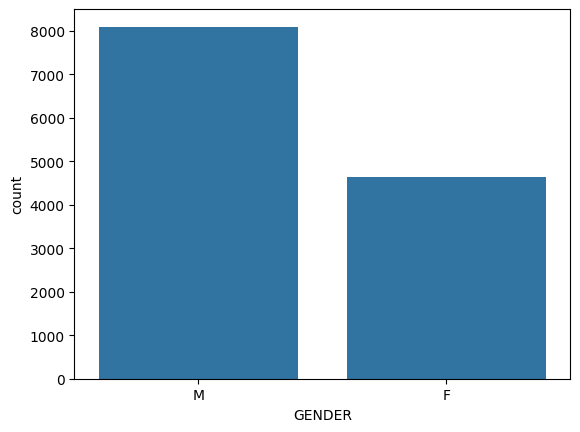

In [7]:
sns.countplot(data=df,x="GENDER")
plt.show()

In [13]:
# Which age group is most frequently admitted?
most_frequent_age_group = df['AGE'].value_counts().idxmax()
print("Most frequently admitted age group:", most_frequent_age_group)

Most frequently admitted age group: 65


In [14]:
# Show value counts of admission types
admission_counts = df['TYPE OF ADMISSION-EMERGENCY/OPD'].value_counts()
print("Most Common Admission Types:\n", admission_counts)


Most Common Admission Types:
 TYPE OF ADMISSION-EMERGENCY/OPD
E    8855
O    3881
Name: count, dtype: int64


<Axes: xlabel='TYPE OF ADMISSION-EMERGENCY/OPD', ylabel='count'>

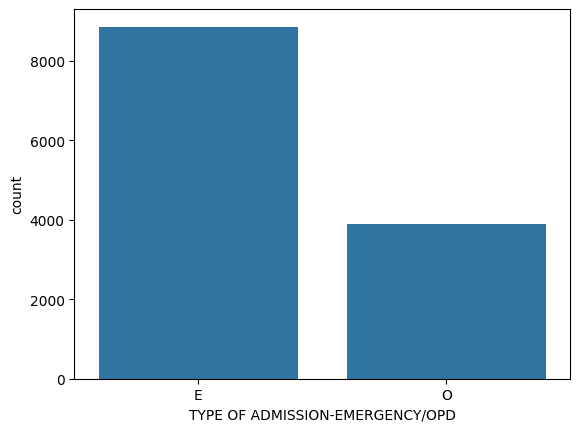

In [15]:
sns.countplot(data = df , x ="TYPE OF ADMISSION-EMERGENCY/OPD")

<Axes: xlabel='admission_type', ylabel='count'>

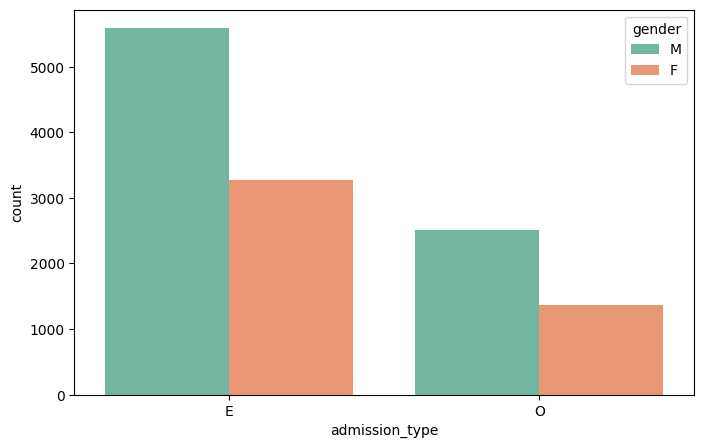

In [27]:


# Standardize column names
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('-', '_')

# Rename columns for clarity
df.rename(columns={'type_of_admission_emergency/opd': 'admission_type'}, inplace=True)

# Plot count of admission types by gender
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='admission_type', hue='gender', palette='Set2')



<Axes: >

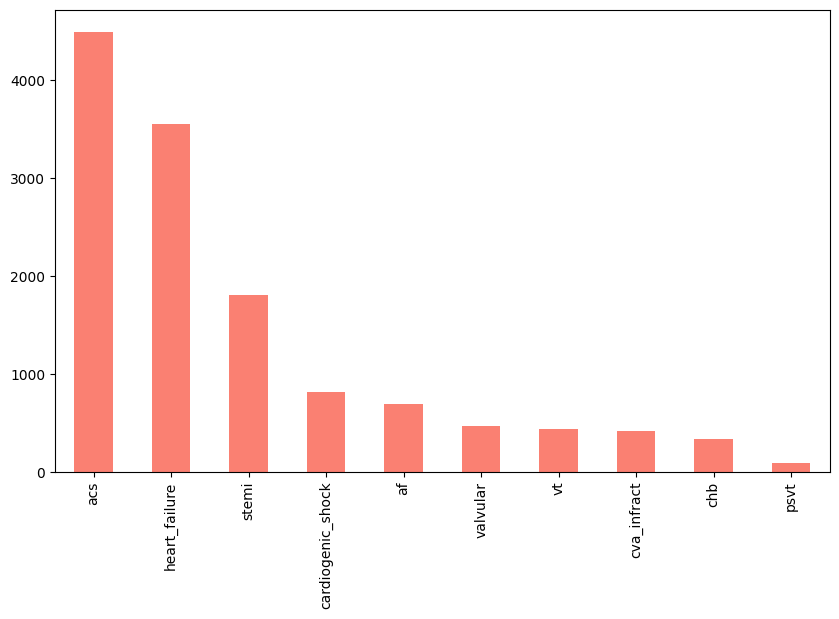

In [20]:
# Select diagnosis columns (binary 0/1 columns for each condition)
diagnosis_cols = [
    'heart_failure', 'stemi', 'acs', 'valvular', 'chb', 'cva_infract',
    'af', 'vt', 'psvt', 'cardiogenic_shock'
]
# Sum total occurrences for each
diagnosis_counts = df[diagnosis_cols].sum().sort_values(ascending=False)
# Plot
diagnosis_counts.head(10).plot(kind='bar', figsize=(10,6), color='salmon')

